In [4]:
# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda
#import sccoda.datasets as scd
print("hello")

2023-02-24 10:30:29.891712: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/R/lib/R/lib::/.singularity.d/libs
2023-02-24 10:30:29.891773: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


hello


In [104]:
#raw_df = pd.read_table("/data/keeyoung/gy_RNA/scCODA/scCODA_stromal_Myofibroblasts.txt", sep='\t', header=0)
raw_df = pd.read_table("/data/keeyoung/gy_RNA/scCODA/scCODA_iCMS.txt", sep='\t', header=0)

In [106]:
df = raw_df.drop(['Mixture'], axis=1)
df.columns[0]
#df.rename(columns = {"iCMS":"nearest_CMS4"}, inplace=True)
df

,Class,nearest,CMS2,CMS3,CMS1,CMS4,Gobletcells,Stem,Intermediate,MEnterocytestype2,...,T_Tfollicularhelpercells,T_CD4+Tcells,T_Thelper17cells,T_gammadeltaTcells,T_NKcells,B_IgG+Plasma,B_CD19+CD20+B,B_IgA+Plasma,B_Unknown,Mastcells
0,iCMS2,CMS2,264.370985,16.557175,0.134831,1.644491,0.000000,25.817437,9.717744,0.000000,...,0.000000,6.362648,76.513979,60.656624,32.156711,27.985980,26.910829,0.000000,12.171896,0.397927
1,iCMS2,CMS4,238.228381,95.381692,0.000000,0.753809,0.000000,0.000000,30.681866,0.000000,...,0.000000,0.000000,69.834859,20.105102,0.000000,33.183146,51.966371,0.000000,10.237835,1.512182
2,iCMS2,CMS4,263.198050,113.256616,0.000000,0.350798,0.000000,0.000000,33.961000,0.000000,...,8.287261,9.854557,68.085756,15.201017,3.442547,37.324065,58.925022,0.000000,5.329900,1.253195
3,iCMS2,CMS2,284.314086,129.016407,0.000000,0.498978,0.000000,0.000000,59.116191,0.000000,...,6.539237,19.972495,56.625970,21.828552,21.138215,27.663641,55.801028,0.000000,9.686705,0.147606
4,iCMS2,CMS4,188.327137,90.073712,0.000000,0.000000,0.000000,0.000000,37.353835,0.000000,...,14.351392,2.795691,65.921699,9.977651,20.621873,25.763236,64.838884,0.000000,8.436904,0.000000
5,iCMS2,CMS4,175.860496,85.317148,0.000000,0.000000,0.000000,0.000000,25.078972,0.000000,...,0.000000,11.827852,48.307118,45.179171,12.717737,23.734315,70.585681,0.000000,4.271603,0.000000
6,iCMS2,CMS2,265.799906,135.683870,0.000000,1.479263,0.000000,46.508903,1.858688,0.000000,...,3.073834,27.674776,59.112358,14.417852,8.261850,33.717668,49.496039,1.311288,11.521976,2.138904
7,iCMS2,CMS2,237.780363,122.560112,0.000000,0.866000,0.000000,56.800059,3.255482,0.000000,...,0.000000,9.584188,61.880432,19.323296,28.106450,38.159017,63.038485,0.000000,5.059440,1.951553
8,iCMS2,CMS4,183.252484,98.402353,0.000000,0.614134,0.000000,0.000000,53.692478,0.000000,...,0.000000,9.198923,69.641521,18.442927,2.746877,39.927961,46.576572,0.000000,0.000000,0.000000
9,iCMS2,CMS4,209.143269,132.507607,0.000000,1.761561,3.048426,46.753922,3.502793,0.000000,...,0.000000,0.000000,56.505428,24.942996,21.745123,53.447861,41.212830,0.000000,10.370642,0.537252


(29, 40)
(14, 40)
(13, 40)
(13, 40)
1      CMS4
2      CMS4
4      CMS4
5      CMS4
8      CMS4
9      CMS4
10     CMS4
13     CMS4
0     other
3     other
6     other
7     other
12    other
Name: iCMS2, dtype: object


Trying to set attribute `.X` of view, copying.


Automatic reference selection! Reference cell type set to cDC
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:23<00:00, 52.20it/s]


MCMC sampling finished. (478.651 sec)
Acceptance rate: 54.0%
Compositional Analysis summary:

Data: 13 samples, 38 cell types
Reference index: 23
Formula: iCMS2

Intercepts:
                          Final Parameter  Expected Sample
Cell Type                                                 
CMS2                                3.007       198.743253
CMS3                                2.423       110.831808
CMS1                               -3.891         0.200692
CMS4                               -1.339         2.575423
Gobletcells                        -2.368         0.920364
Stem                               -1.098         3.277280
Intermediate                        0.600        17.903815
MEnterocytestype2                  -3.690         0.245370
MEnterocytestype1                  -2.203         1.085471
Myofibroblasts                      1.849        62.427995
Stromal1                           -0.999         3.618334
Stromal2                            0.327        13.626464


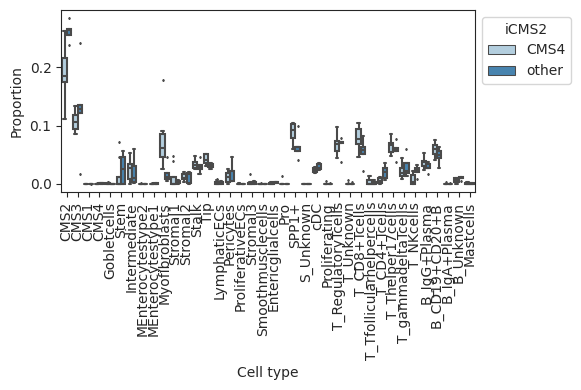

In [107]:
print(df.shape)
df_iCMS2 = df[df['Class']== "iCMS2"]
print(df_iCMS2.shape)
df_iCMS2 = df_iCMS2[df_iCMS2["nearest"]!="CMS1"]
print(df_iCMS2.shape)
df_iCMS2 = df_iCMS2.replace({"nearest": {"CMS2":"other", "CMS3":"other"}})
print(df_iCMS2.shape)
df_iCMS2 = df_iCMS2.drop(["Class"],axis=1)
df_iCMS2.columns[0]
df_iCMS2.rename(columns = {"nearest":"iCMS2"}, inplace=True)
df_iCMS2 = df_iCMS2.sort_values(by=["iCMS2"])

df_iCMS2_dat = dat.from_pandas(df_iCMS2, covariate_columns=["iCMS2"])
print(df_iCMS2_dat.obs["iCMS2"])
data_iCMS2 = df_iCMS2_dat[df_iCMS2_dat.obs["iCMS2"].isin(["CMS4","other"])]
viz.boxplots(data_iCMS2, feature_name="iCMS2")

model_iCMS2 = mod.CompositionalAnalysis(data_iCMS2, formula="iCMS2", reference_cell_type="automatic")
sim_results_iCMS2 = model_iCMS2.sample_hmc()

path_iCMS2="/data/keeyoung/gy_RNA/scCODA/scCODA_compare_CMS4toCMS2-3_in_iCMS2"
sim_results_iCMS2.save(path_iCMS2)


# loading
with open(path_iCMS2, "rb") as f:
    sim_results_iCMS2 = pkl.load(f)
    
sim_results_iCMS2.summary()
print(sim_results_iCMS2.credible_effects())

(29, 40)
(15, 40)
(12, 40)
(12, 40)
14     CMS4
16     CMS4
18     CMS4
20     CMS4
21     CMS4
28     CMS4
15    other
17    other
22    other
23    other
25    other
26    other
Name: iCMS3, dtype: object


Trying to set attribute `.X` of view, copying.


Zero counts encountered in data! Added a pseudocount of 0.5.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:13<00:00, 53.53it/s]


MCMC sampling finished. (465.952 sec)
Acceptance rate: 64.5%
Compositional Analysis summary:

Data: 12 samples, 38 cell types
Reference index: 13
Formula: iCMS3

Intercepts:
                          Final Parameter  Expected Sample
Cell Type                                                 
CMS2                                1.836        51.428042
CMS3                                3.383       241.575869
CMS1                               -5.834         0.023997
CMS4                               -1.633         1.601889
Gobletcells                         0.251        10.540064
Stem                                2.276        79.852692
Intermediate                       -6.198         0.016675
MEnterocytestype2                  -0.329         5.901364
MEnterocytestype1                  -3.586         0.227225
Myofibroblasts                      0.848        19.147719
Stromal1                            0.182         9.837323
Stromal2                            0.818        18.581818


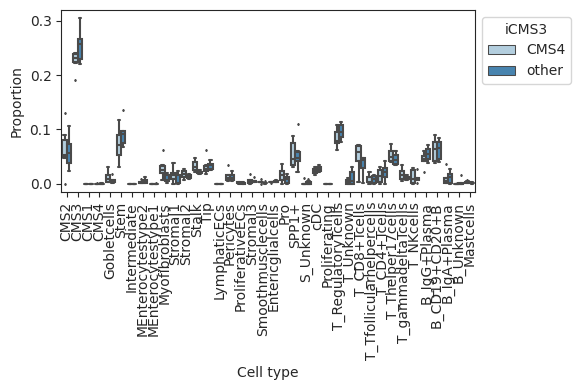

In [115]:
print(df.shape)
df_iCMS3 = df[df['Class']== "iCMS3"]
print(df_iCMS3.shape)
df_iCMS3 = df_iCMS3[df_iCMS3["nearest"]!="CMS1"]
print(df_iCMS3.shape)
df_iCMS3 = df_iCMS3.replace({"nearest": {"CMS2":"other", "CMS3":"other"}})
print(df_iCMS3.shape)
df_iCMS3 = df_iCMS3.drop(["Class"],axis=1)
df_iCMS3.columns[0]
df_iCMS3.rename(columns = {"nearest":"iCMS3"}, inplace=True)
df_iCMS3 = df_iCMS3.sort_values(by=["iCMS3"])

df_iCMS3_dat = dat.from_pandas(df_iCMS3, covariate_columns=["iCMS3"])
print(df_iCMS3_dat.obs["iCMS3"])
data_iCMS3 = df_iCMS3_dat[df_iCMS3_dat.obs["iCMS3"].isin(["CMS4","other"])]
viz.boxplots(data_iCMS3, feature_name="iCMS3")

#model_iCMS3 = mod.CompositionalAnalysis(data_iCMS3, formula="iCMS3", reference_cell_type="automatic")
model_iCMS3 = mod.CompositionalAnalysis(data_iCMS3, formula="iCMS3", reference_cell_type="Tip")
sim_results_iCMS3 = model_iCMS3.sample_hmc()

path_iCMS3="/data/keeyoung/gy_RNA/scCODA/scCODA_compare_CMS4toCMS2-3_in_iCMS3"
sim_results_iCMS3.save(path_iCMS3)


# loading
with open(path_iCMS3, "rb") as f:
    sim_results_iCMS3 = pkl.load(f)
    
sim_results_iCMS3.summary()
print(sim_results_iCMS3.credible_effects())

In [9]:
path_iCMS2="/data/keeyoung/gy_RNA/scCODA/scCODA_compare_CMS4toCMS2-3_in_iCMS2"

# loading
with open(path_iCMS2, "rb") as f:
    sim_results_iCMS2 = pkl.load(f)
    
sim_results_iCMS2.set_fdr(est_fdr=0.01)
sim_results_iCMS2.summary()
print(sim_results_iCMS2.credible_effects())

Compositional Analysis summary:

Data: 13 samples, 38 cell types
Reference index: 23
Formula: iCMS2

Intercepts:
                          Final Parameter  Expected Sample
Cell Type                                                 
CMS2                                3.007       198.743253
CMS3                                2.423       110.831808
CMS1                               -3.891         0.200692
CMS4                               -1.339         2.575423
Gobletcells                        -2.368         0.920364
Stem                               -1.098         3.277280
Intermediate                        0.600        17.903815
MEnterocytestype2                  -3.690         0.245370
MEnterocytestype1                  -2.203         1.085471
Myofibroblasts                      1.849        62.427995
Stromal1                           -0.999         3.618334
Stromal2                            0.327        13.626464
Stalk                               1.302        36.126035
Ti

In [16]:
path_iCMS3="/data/keeyoung/gy_RNA/scCODA/scCODA_compare_CMS4toCMS2-3_in_iCMS3"
# loading
with open(path_iCMS3, "rb") as f:
    sim_results_iCMS3 = pkl.load(f)

sim_results_iCMS3.set_fdr(est_fdr=0.5)
sim_results_iCMS3.summary()
print(sim_results_iCMS3.credible_effects())

Compositional Analysis summary:

Data: 12 samples, 38 cell types
Reference index: 13
Formula: iCMS3

Intercepts:
                          Final Parameter  Expected Sample
Cell Type                                                 
CMS2                                1.836        51.428042
CMS3                                3.383       241.575869
CMS1                               -5.834         0.023997
CMS4                               -1.633         1.601889
Gobletcells                         0.251        10.540064
Stem                                2.276        79.852692
Intermediate                       -6.198         0.016675
MEnterocytestype2                  -0.329         5.901364
MEnterocytestype1                  -3.586         0.227225
Myofibroblasts                      0.848        19.147719
Stromal1                            0.182         9.837323
Stromal2                            0.818        18.581818
Stalk                               1.312        30.452972
Ti